In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import regex as re
from collections import Counter
import pickle
import json

In [ ]:
## Getting data from file in drive
!conda install -y gdown

^C

CondaError: KeyboardInterrupt



In [ ]:
# https://drive.google.com/file/d/1fAUp6XIFyrytQ4uTBHd17RBgGCFiwaZf/view?usp=share_link

!gdown --id 1fAUp6XIFyrytQ4uTBHd17RBgGCFiwaZf

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1fAUp6XIFyrytQ4uTBHd17RBgGCFiwaZf 



In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv
/kaggle/input/food-com-recipes-and-user-interactions/ingr_map.pkl
/kaggle/input/food-com-recipes-and-user-interactions/PP_recipes.csv
/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_train.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_test.csv
/kaggle/input/food-com-recipes-and-user-interactions/PP_users.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_validation.csv


In [ ]:
RAW_interactions = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv')
# /kaggle/input/food-com-recipes-and-user-interactions/ingr_map.pkl
PP_recipes = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/PP_recipes.csv')
RAW_recipes = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv')
interactions_train = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/interactions_train.csv')
interactions_test = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/interactions_test.csv')
PP_users = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/PP_users.csv')
interactions_validation = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/interactions_validation.csv')


# EDA

In [ ]:
RAW_interactions.iloc[0]['review']

'Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.'

In [ ]:
PP_recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


### Performing eda on raw_recipes

In [ ]:
RAW_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [ ]:
RAW_recipes['description'][0]

'autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.'

In [ ]:
def show_most_common_words(col, most_common_num = 10):
    """
    col_name : dataframe column containing strings
    most_common: how many most common words to show

    return: show a pie chart of most_common words
    """
    name = list(col)

    stop_words = set(stopwords.words('english'))
    rem = np.array([])
    for i in range(len(name)):
        try:
            name[i] = word_tokenize(name[i])
        except:
            rem = np.append(rem,i)
            print(i)
    
    # removing names with errors
    for i in range(len(rem)):
        name.pop(int(rem[i]))
        rem -= 1

    # removing stop words   
    for i in range(len(name)):
        temp = []
        try:
            for word in name[i]:
                if word not in stop_words:
                    temp.append(word)
            name[i] = temp
        except:
            print(name[i])

    # creating main corpus
    main_name_corpus = []

    for i in name:
        main_name_corpus.extend(i)

    # counting words    
    c = Counter(main_name_corpus)


    # plotting common words
    most_common = c.most_common(most_common_num)

    num = list(map(int, np.array(most_common)[:,1]))
    words_in_names = np.array(most_common)[:,0]

    plt.figure(figsize = (7,7))
    plt.pie(num, labels = words_in_names, autopct='%1.1f%%')
    plt.title('Most common words used')
    plt.show()

721


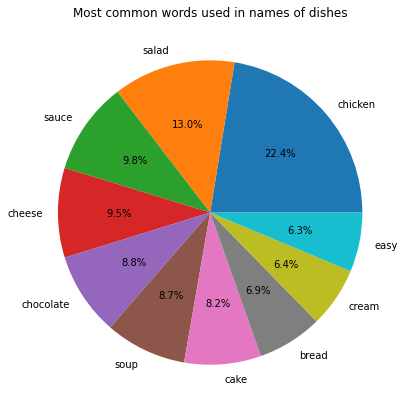

In [ ]:
show_most_common_words(RAW_recipes['name'], 10)

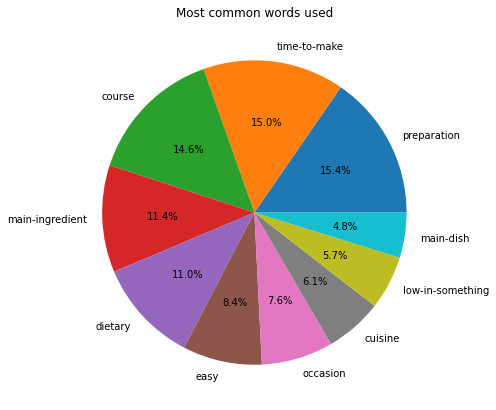

In [ ]:
tags = []
regex = "'(.*?)'"

for i in range(len(RAW_recipes['tags'])):
    tags.append(' '.join(re.findall(regex, RAW_recipes['tags'][i])))

show_most_common_words(tags, 10)

Most Common Ingredients


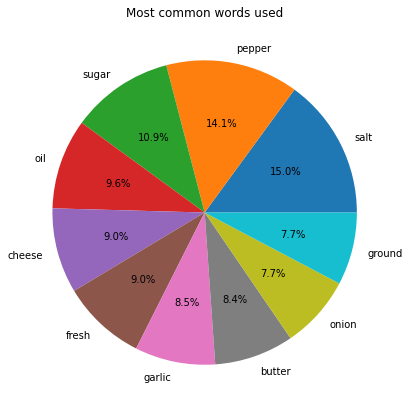

In [ ]:
ingredients = []
regex = "'(.*?)'"

for i in range(len(RAW_recipes['ingredients'])):
    ingredients.append(' '.join(re.findall(regex, RAW_recipes['ingredients'][i])))

print('Most Common Ingredients')
show_most_common_words(ingredients, 10)

#### marking the foods high in different nutritional values based on link below.
https://www.fda.gov/food/new-nutrition-facts-label/lows-and-highs-percent-daily-value-new-nutrition-facts-label

for saturated fat : https://www.accessdata.fda.gov/scripts/interactivenutritionfactslabel/assets/InteractiveNFL_SaturatedFat_October2021.pdf

#### Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat
#### setting the upper limit of calories as 700 based on below
https://globalnews.ca/news/3615212/this-is-what-your-breakfast-lunch-and-dinner-calories-actually-look-like/

In [ ]:
RAW_recipes['nutrition'][0]

'[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]'

### Understanding the data

In [ ]:
# RAW_interactions
RAW_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [ ]:
len(RAW_interactions['user_id'].unique())

226570

In [ ]:
len(RAW_interactions['recipe_id'].unique())

231637

In [ ]:
RAW_interactions['review']

0          Great with a salad. Cooked on top of stove for...
1          So simple, so delicious! Great for chilly fall...
2          This worked very well and is EASY.  I used not...
3          I made the Mexican topping and took it to bunk...
4          Made the cheddar bacon topping, adding a sprin...
                                 ...                        
1132362    Another approach is to start making sauce with...
1132363    These were so delicious!  My husband and I tru...
1132364    WOW!  Sometimes I don't take the time to rate ...
1132365    Very good!  I used regular port as well.  The ...
1132366    I am so glad I googled and found this here. Th...
Name: review, Length: 1132367, dtype: object

In [ ]:
def get_interaction_and_recp(id):
        print(RAW_interactions['review'][id], end='\n\n')
        temp = RAW_recipes[RAW_recipes['id'] == RAW_interactions['recipe_id'][id]]
        print(f"Name - {temp['name'].iloc[0]}", end='\n\n')
        print(f"tags - {temp['tags'].iloc[0]}", end='\n\n')
        print(f'steps - {temp["steps"].iloc[0]}', end='\n\n')
        print(f'description - {temp["description"].iloc[0]}', end='\n\n')
        print(f'ingredients - {temp["ingredients"].iloc[0]}', end='\n\n')
# RAW_recipes[RAW_recipes['id'] == RAW_interactions['recipe_id'][0]]
get_interaction_and_recp(1)

So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!

Name - white bean   green chile pepper soup

tags - ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'soups-stews', 'beans', 'vegetables', 'easy', 'crock-pot-slow-cooker', 'dietary', 'equipment']

steps - ['combine beans , onion , chilies , 1 / 2 teaspoon cumin , garlic powder and broth in crock pot', 'cook on low 8 hours or on high 4 hours', 'stir in cilantro , olive oil and remaining 1 / 2 teaspoon cumin', 'garnish with sour cream , if desired']

description - easy soup for the crockpot.

ingredients - ['great northern beans', 'yellow onion', 'diced green chilies', 'ground cumin', 'garlic powder', 'fat-free chicken broth', 'fresh cilantro leaves', 'extra virgin olive oil', 'sour cream']



white bean   green chile pepper soup
easy soup for the crockpot

'weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'soups-stews', 'beans', 'vegetables', 'easy', 'crock-pot-slow-cooker', 'dietary', 'equipment'

'great northern beans', 'yellow onion', 'diced green chilies', 'ground cumin', 'garlic powder', 'fat-free chicken broth', 'fresh cilantro leaves', 'extra virgin olive oil', 'sour cream'


In [ ]:
# testing what all reviews are
test = RAW_interactions[RAW_interactions['recipe_id'] == RAW_interactions['recipe_id'][1500]]

for i in range(test.shape[0]):
    print(test['review'].iloc[i], end = '\n\n')

 i love buffulo wings and this makes it easy 

This is a lower calorie and neater way to enjoy Buffalo chicken.  Loved the sauce.  Thanks for sharing the recipe.

Very satisfying & flavourful way to do chicken - tasted just like wings!  I browned the chicken on the Foreman Grill.  I think next time, I will double the sauce so the chicken ends up saucier.  We don't care for blue cheese dressing so I just served with roasted potatoes & they were great!

Everyone loved this chicken! I used Frank's Hot sauce and made the recipe as is.  I was leary of the vinegar but it worked well and I liked the addition of the celery seeds.  We made ours into Buffalo Chicken sandwiches - yum! Next time I might make just a little more sauce to add after the chicken is cooked. We are wing lovers and this sure makes getting that taste easy.

This was absolutely yummy, and very easy!!!  I like that I could eat "buffalo" sauce without all the fat!  I made extra sauce to drizzle over the chicken when it was co

In [ ]:
corpus = []
tokenizer = nltk.RegexpTokenizer(r"\w+")
for i in range(test.shape[0]-1, test.shape[0] - 20, -1):
    corpus.extend(tokenizer.tokenize(test['review'].iloc[i]))
    
stop_words = set(stopwords.words('english'))
corpus = [w.lower() for w in corpus if not w.lower() in stop_words]

lemmatizer = WordNetLemmatizer()
corpus = [lemmatizer.lemmatize(w) for w in corpus]

c = Counter(corpus)

main_words = [w[0] for w in c.most_common(20)]


In [ ]:
# testing what all reviews are
test = RAW_interactions[RAW_interactions['recipe_id'] == RAW_interactions['recipe_id'][2100]]

for i in range(test.shape[0]):
    print(test['review'].iloc[i], end = '\n\n')

This is a delicious, healthy and beautiful salad that takes only minutes to prepare.  I look forward to the homegrown tomatoes and basil from my garden.

Sounds good.  I would mince the basil, and place it directly on the tomatoes.

This recipe is *awesome*, but here's a nifty little hint:

Instead of regular mozzarella, use buffalo mozzarella.  Add cucumbers to this dish, and spoon a homemade salsa relish (think tomatoes, not heat) on top of the cheese.

A superb little dish!

I agree with the other comments (use fresh mozerella, etc.) It's hard to find in some areas. Trader Joe's has it. Italian deli's have it, if you are lucky enough to have one where you live. I just have one suggestion. Drizzle on some Balsamic vinegar along with the olive oil. I travelled all over Italy last summer and ate this salad everywhere. Many places added the Balsamic and it makes a good salad really good!

This is a great light salad.  Even my children love it.  I like to add a little fresh cracked black

In [ ]:
def get_main_words(recp_id, tokenizer, stop_words, lemmatizer):
    """
    req lib:
    from collections import Counter
    
    files used:
    RAW_interactions
    
    following things are preferred
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    this function will return top 20 most used words in the interaction of a given recipe.
    if the interactions are more than 22 then only last 20 interactions are considered in
    most common words generation
    """
    
    try:
        test = RAW_interactions[RAW_interactions['recipe_id'] == recp_id]
        corpus = []

        if test.shape[0] >= 22:
            for i in range(test.shape[0]-1, test.shape[0] - 21, -1):
                if not isinstance(test['review'].iloc[i], float):
                    corpus.extend(tokenizer.tokenize(test['review'].iloc[i]))
        else:
            for i in range(test.shape[0]):
                if not isinstance(test['review'].iloc[i], float):
                    corpus.extend(tokenizer.tokenize(test['review'].iloc[i]))


        corpus = [w.lower() for w in corpus if not w.lower() in stop_words]


        corpus = [lemmatizer.lemmatize(w) for w in corpus]

        c = Counter(corpus)

        main_words = [w[0] for w in c.most_common(40)]
        return main_words
    except:
        return []

In [ ]:
unique_ids = RAW_interactions['recipe_id'].unique()
recipe_main_words = dict()

tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

count = 0

for unq in unique_ids:
    recipe_main_words[unq] = get_main_words(unq, tokenizer, stop_words, lemmatizer)
    
    if count % 1000 == 0:
        print(count)
        count += 1
    else:
        count += 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [ ]:
rem = []

for i in recipe_main_words.keys():
    if len(recipe_main_words[i]) == 0:
        rem.append(i)
        
for i in rem:
    del recipe_main_words[i]

In [ ]:
for i in recipe_main_words.keys():
    if len(recipe_main_words[i]) != 20:
        recipe_main_words[i].extend([np.nan for _ in range(20 - len(recipe_main_words[i]))])

In [ ]:
pd.DataFrame(recipe_main_words).T.to_excel('/kaggle/working/common_words_interactions_1.xlsx')

Exception ignored in: <function ZipFile.__del__ at 0x7f4103038290>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/zipfile.py", line 1809, in __del__
    self.close()
  File "/opt/conda/lib/python3.7/zipfile.py", line 1826, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


### Exploring PP_recipes

In [ ]:
PP_users

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...,...
25071,25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2
25074,25074,"[2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[157808, 159896]",2,"[5.0, 5.0]",2


In [ ]:
PP_recipes.iloc[0]

id                                                              424415
i                                                                   23
name_tokens          [40480, 37229, 2911, 1019, 249, 6878, 6878, 28...
ingredient_tokens    [[2911, 1019, 249, 6878], [1353], [6953], [153...
steps_tokens         [40480, 40482, 21662, 481, 6878, 500, 246, 161...
techniques           [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
calorie_level                                                        0
ingredient_ids                           [389, 7655, 6270, 1527, 3406]
Name: 0, dtype: object

In [ ]:
PP_users.iloc[0]['items']
# PP_users.iloc[0]['ratings']

'[1118, 27680, 32541, 137353, 16428, 28815, 65803, 148743, 129939, 99377, 33025, 173660, 46706, 100515, 101276, 93176, 70383, 24204, 0, 172222, 19472, 90038, 84063, 71578, 11190, 58387, 27749, 101225, 85204, 89385, 161655]'

In [ ]:
PP_recipes[PP_recipes['i'] == 0]

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
46053,40893,0,"[40480, 1454, 16201, 2056, 955, 541, 11332, 82...","[[1424, 8876, 11007], [3484, 21453], [38966, 2...","[40480, 40482, 23667, 11007, 240, 21453, 240, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500..."


In [ ]:
PP_recipes.iloc[0]['techniques']

'[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'

In [ ]:
PP_users.iloc[0]['techniques']
# PP_users.iloc[0]

'[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, 0, 5, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 8, 0, 0, 8, 2, 2, 0, 0, 0, 3, 3, 1, 0, 5, 0, 0, 2, 1, 1, 0, 3, 1, 7, 2, 2]'

### Exploring RAW_recipes

In [ ]:
RAW_recipes['steps'].iloc[0]

"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']"

In [ ]:
RAW_recipes['description'].iloc[1068]

"all i have to say, is that i'm obsessed with this recipe... i've never tasted better fudge! it's so good... although it's very sweet and very rich! prep time includes chill time."

In [ ]:
RAW_recipes['ingredients'].iloc[1068]

"['powdered sugar', 'cocoa', 'salt', 'milk', 'vanilla', 'butter', 'nuts']"

In [ ]:
RAW_recipes['name'].iloc[1068]

'2 minute microwave fudge'

In [ ]:
RAW_recipes['tags'].iloc[0]

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

### important columns can be name, tags, description, ingredients

In [ ]:
RAW_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


### testing for extracting features

In [ ]:
# RAW_recipes['name']
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_main_words_rec_name(recp_id, tokenizer, stop_words, lemmatizer):
    """   
    files used:
    RAW_interactions
    
    following things are preferred
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    this function will return top 20 most used words in the interaction of a given recipe.
    if the interactions are more than 22 then only last 20 interactions are considered in
    most common words generation
    """
    
    try:
        test = RAW_recipes[RAW_recipes['id'] == recp_id]['name'].iloc[0]
        corpus = []
        corpus.extend(tokenizer.tokenize(test))
        corpus = [w.lower() for w in corpus if not w.lower() in stop_words]
        corpus = [lemmatizer.lemmatize(w) for w in corpus]
        return corpus
    except:
        return []
    
def get_tags_words_rec(recp_id, tokenizer, stop_words, lemmatizer):
    regex = "'(.*?)'"
    try:
        corpus = tokenizer.tokenize(' '.join(re.findall(regex, RAW_recipes[RAW_recipes['id'] == recp_id].iloc[0]['tags'])))
        corpus = [w.lower() for w in corpus if not w.lower() in stop_words]
        corpus = [lemmatizer.lemmatize(w) for w in corpus]
        return corpus
    except:
        return []

    
def get_decription_words_rec(recp_id, tokenizer, stop_words, lemmatizer):
    """   
    files used:
    RAW_interactions
    
    following things are preferred
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    this function will return top 20 most used words in the interaction of a given recipe.
    if the interactions are more than 22 then only last 20 interactions are considered in
    most common words generation
    """
    
    try:
        test = RAW_recipes[RAW_recipes['id'] == recp_id]['description']
        corpus = []
        corpus.extend(tokenizer.tokenize(test.iloc[0]))
        corpus = [w.lower() for w in corpus if not w.lower() in stop_words]
        corpus = [lemmatizer.lemmatize(w) for w in corpus]
        return corpus
    except:
        return []

def get_ingredients_words_rec(recp_id, tokenizer, stop_words, lemmatizer):
    regex = "'(.*?)'"
    try:
        corpus = tokenizer.tokenize(' '.join(re.findall(regex, RAW_recipes[RAW_recipes['id'] == recp_id].iloc[0]['ingredients'])))
        corpus = [w.lower() for w in corpus if not w.lower() in stop_words]
        corpus = [lemmatizer.lemmatize(w) for w in corpus]
        return corpus
    except:
        return []

In [ ]:
c = []
c.extend(get_main_words_rec_name(137739, tokenizer, stop_words, lemmatizer))
c.extend(get_tags_words_rec(137739, tokenizer, stop_words, lemmatizer))
c.extend(get_decription_words_rec(137739, tokenizer, stop_words, lemmatizer))
c.extend(get_ingredients_words_rec(137739, tokenizer, stop_words, lemmatizer))
c

['arriba',
 'baked',
 'winter',
 'squash',
 'mexican',
 'style',
 '60',
 'minute',
 'le',
 'time',
 'make',
 'course',
 'main',
 'ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north',
 'american',
 'side',
 'dish',
 'vegetable',
 'mexican',
 'easy',
 'fall',
 'holiday',
 'event',
 'vegetarian',
 'winter',
 'dietary',
 'christmas',
 'seasonal',
 'squash',
 'autumn',
 'favorite',
 'time',
 'year',
 'cook',
 'recipe',
 'prepared',
 'either',
 'spicy',
 'sweet',
 'choice',
 'two',
 'posted',
 'mexican',
 'inspired',
 'seasoning',
 'mix',
 'recipe',
 'offered',
 'suggestion',
 'winter',
 'squash',
 'mexican',
 'seasoning',
 'mixed',
 'spice',
 'honey',
 'butter',
 'olive',
 'oil',
 'salt']

In [ ]:
temp_data = pd.read_excel('/kaggle/input/interactions-main-words/common_words_interactions_1.xlsx')
temp_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,40893,great,br,cumin,salad,cooked,top,stove,15,minute,...,shake,cayenne,pinch,salt,used,low,fat,sour,cream,thanks
1,44394,worked,well,easy,used,quite,whole,package,10oz,white,...,great,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85009,made,topping,mexican,took,bunko,everyone,loved,cheddar,bacon,...,sprinkling,black,pepper,yum,NaN,NaN,NaN,NaN,NaN,NaN
3,120345,recipe,raspberry,sweet,2,add,would,mix,strawberry,keep,...,appears,1,cup,sugar,much,make,waited,day,bought,pint
4,134728,chicken,good,made,recipe,bbq,make,absolutely,amount,posting,...,flavorful,oven,sauce,kid,first,better,real,awesome,speechless,tried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231614,470995,title,promised,lovely,shrimp,garlic,pure,simple,serving,added,...,smoked,salt,served,brown,rice,steamed,broccoli,tasty,quick,easy
231615,241491,added,made,used,canned,bean,bacon,apple,vegetarian,recipe,...,changed,little,really,ingredient,way,navy,rather,dried,cut,small
231616,257796,chicken,tender,juicy,trouble,getting,slow,cooker,slid,bone,...,like,roast,find,dry,much,liking,also,left,lovely,stock
231617,72730,another,approach,start,making,sauce,fresh,cranberry,add,slice,...,cooking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(temp_data.iloc[0])

[40893,
 'great',
 'br',
 'cumin',
 'salad',
 'cooked',
 'top',
 'stove',
 '15',
 'minute',
 'added',
 'shake',
 'cayenne',
 'pinch',
 'salt',
 'used',
 'low',
 'fat',
 'sour',
 'cream',
 'thanks']

In [ ]:
recipe_main_words = {}

for i in range(temp_data.shape[0]):
    temp_list = list(temp_data.iloc[i])
    recipe_main_words[temp_list[0]] = temp_list[1:]

In [ ]:
# temp_data[]
# temp_data.rename(columns = {'Unnamed: 0': 'id'}, inplace = True)
# type(list(temp_data.iloc[1])[-1])
check = []

for i in recipe_main_words.keys():
    for item in recipe_main_words[i]:
        if not isinstance(item, float):
            check.append(item)

In [ ]:
check_counter = Counter(check)

In [ ]:
# check_counter

In [ ]:
# check_counter = Counter(check)
# check_counter.most_common(50)

remove_words = ['recipe', 'made', 'used', 'thanks', 'make', 'good', 'great', 'time', 'really', 'like', 'added', 'delicious'
               'would','also','use', 'loved', 'taste','much','love','add','nice','next','sharing', 'wonderful', 'dish',
               'think','well','thank', 'tasty', 'posting', 'making', 'try', 'served', 'enjoyed']

for key in check_counter.keys():
    if check_counter[key] <= 50:
        remove_words.append(key)

In [ ]:
main_receipe_corpus = {}
not_found = []
count = 0
for uniqid in RAW_recipes['id'].unique():
    
    try:
        temp = []
        temp.extend(get_main_words_rec_name(uniqid, tokenizer, stop_words, lemmatizer))
        temp.extend(get_tags_words_rec(uniqid, tokenizer, stop_words, lemmatizer))
#         temp.extend(get_decription_words_rec(uniqid, tokenizer, stop_words, lemmatizer))
        temp.extend(get_ingredients_words_rec(uniqid, tokenizer, stop_words, lemmatizer))

        for item in recipe_main_words[uniqid]:
            if item not in remove_words:
                temp.append(item)

        main_receipe_corpus[uniqid] = temp
        
        if count % 1000 == 0:
            print(count)
            count += 1
        else:
            count += 1
    except:
        not_found.append(uniqid)
        if count % 1000 == 0:
            print(count)
            count += 1
        else:
            count += 1
        

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [ ]:
# main_receipe_corpus
# /kaggle/working/final_recipe_corpus.txt

In [ ]:
with open('/kaggle/working/final_recipe_corpus_reduced.pkl', 'wb') as f:
    pickle.dump(main_receipe_corpus, f)

In [ ]:
main_corpus = set()

for key in main_receipe_corpus.keys():
    for item in main_receipe_corpus[key]:
        main_corpus.add(item)
        
main_corpus = list(main_corpus)

In [ ]:
len(main_corpus)

28232

In [ ]:
for key in main_receipe_corpus.keys():
    temp_list = []
    for item in main_receipe_corpus[key]:
        if not isinstance(item, float):
            temp_list.append(item)
    main_receipe_corpus[key] = temp_list

In [ ]:
# main_corpus
main_document = []

for key in main_receipe_corpus.keys():
    main_document.append(' '.join(main_receipe_corpus[key]))

In [ ]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(main_document)

In [ ]:
result

<231619x108021 sparse matrix of type '<class 'numpy.float64'>'
	with 16895539 stored elements in Compressed Sparse Row format>

In [ ]:
len(tfidf.get_feature_names_out())

28197

In [ ]:
result.toarray()

In [ ]:
result